Classification and Clustering of Breast Cancer for prediction of diagnosis

#Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import plotly.offline as py
from matplotlib.lines import Line2D
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
plt.style.use('ggplot')

In [2]:
# Importing dataset
df=pd.read_csv('F:/data.csv')


In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [5]:
df.shape 

(569, 33)

In [6]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#Description about the dataset
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [8]:
# dropping unncessary columns
df.drop("Unnamed: 32",axis=1,inplace=True)


In [9]:
#checking missing values
df.isnull().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
#Checking duplicate values
df.duplicated().sum()

0

Covariance

In [11]:
df.cov()

id   radius_mean  texture_mean  \
id                       1.563015e+16  3.287883e+07  5.364807e+07   
radius_mean              3.287883e+07  1.241892e+01  4.907582e+00   
texture_mean             5.364807e+07  4.907582e+00  1.849891e+01   
perimeter_mean           2.222490e+08  8.544714e+01  3.443976e+01   
area_mean                4.262946e+09  1.224483e+03  4.859938e+02   
smoothness_mean         -2.280205e+04  8.454460e-03 -1.414779e-03   
compactness_mean         6.318839e+02  9.419706e-02  5.376681e-02   
concavity_mean           4.991277e+05  1.901276e-01  1.036923e-01   
concave points_mean      2.142177e+05  1.124751e-01  4.897693e-02   
symmetry_mean           -7.579262e+04  1.427317e-02  8.418876e-03   
fractal_dimension_mean  -4.635137e+04 -7.753706e-03 -2.321158e-03   
radius_se                4.959431e+06  6.636503e-01  3.290374e-01   
texture_se              -5.190618e+05 -1.891886e-01  9.166951e-01   
perimeter_se             3.471365e+07  4.803550e+00  2.449449e+00   
area_se                  1.010874e+09  1.179682e+02  5.084087e+01   
smoothness_se            3.632916e+04 -2.355336e-03  8.540990e-05   
compactness_se           7.603492e+04  1.300051e-02  1.478660e-02   
concavity_se             2.084665e+05  2.065883e-02  1.860393e-02   
concave points_se        6.076269e+04  8.179563e-03  4.348380e-03   
symmetry_se             -1.788548e+04 -3.038982e-03  3.245070e-04   
fractal_dimension_se     8.510281e+03 -3.976249e-04  6.197726e-04   
radius_worst             4.979381e+07  1.651375e+01  7.329267e+00   
texture_worst            4.973106e+07  6.433100e+00  2.411015e+01   
perimeter_worst          3.360214e+08  1.142886e+02  5.174593e+01   
area_worst               7.629681e+09  1.888227e+03  8.412838e+02   
smoothness_worst         2.951016e+04  9.624625e-03  7.611070e-03   
compactness_worst       -5.838341e+04  2.292492e-01  1.880100e-01   
concavity_worst          6.051816e+05  3.873864e-01  2.701101e-01   
concave points_worst     2.890528e+05  1.723927e-01  8.349085e-02   
symmetry_worst          -3.420616e+05  3.574576e-02  2.794199e-02   
fractal_dimension_worst -6.743751e+04  4.497351e-04  9.260129e-03   

                         perimeter_mean     area_mean  smoothness_mean  \
id                         2.222490e+08  4.262946e+09    -22802.053383   
radius_mean                8.544714e+01  1.224483e+03         0.008454   
texture_mean               3.443976e+01  4.859938e+02        -0.001415   
perimeter_mean             5.904405e+02  8.435772e+03         0.070836   
area_mean                  8.435772e+03  1.238436e+05         0.876178   
smoothness_mean            7.083607e-02  8.761781e-01         0.000198   
compactness_mean           7.147141e-01  9.264931e+00         0.000490   
concavity_mean             1.387234e+00  1.924492e+01         0.000585   
concave points_mean        8.023604e-01  1.124196e+01         0.000302   
symmetry_mean              1.219216e-01  1.459596e+00         0.000215   
fractal_dimension_mean    -4.485888e-02 -7.034264e-01         0.000058   
radius_se                  4.661401e+00  7.149094e+01         0.001176   
texture_se                -1.162988e+00 -1.286717e+01         0.000531   
perimeter_se               3.405303e+01  5.170100e+02         0.008420   
area_se                    8.234928e+02  1.280852e+04         0.157742   
smoothness_se             -1.478818e-02 -1.762210e-01         0.000014   
compactness_se             1.091112e-01  1.339725e+00         0.000080   
concavity_se               1.672962e-01  2.205952e+00         0.000105   
concave points_se          6.105470e-02  8.084602e-01         0.000033   
symmetry_se               -1.639643e-02 -2.108964e-01         0.000023   
fractal_dimension_se      -3.551365e-04 -1.851854e-02         0.000011   
radius_worst               1.138581e+02  1.637521e+03         0.014487   
texture_worst              4.525811e+01  6.218249e+02         0.003118   
perimeter_worst            7.923282e+02  1.134179e

Correlation

In [12]:
df.corr()

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.679090      0.275869        0.691765   
texture_se              -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se             0.137331     0.674172      0.281673        0.693135   
area_se                  0.177742     0.735864      0.259845        0.744983   
smoothness_se            0.096781    -0.222600      0.006614       -0.202694   
compactness_se           0.033961     0.206000      0.191975        0.250744   
concavity_se             0.055239     0.194204      0.143293        0.228082   
concave points_se        0.078768     0.376169      0.163851        0.407217   
symmetry_se             -0.017306    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.025725    -0.042641      0.054458       -0.005523   
radius_worst             0.082405     0.969539      0.352573        0.969476   
texture_worst            0.064720     0.297008      0.912045        0.303038   
perimeter_worst          0.079986     0.965137      0.358040        0.970387   
area_worst               0.107187     0.941082      0.343546        0.941550   
smoothness_worst         0.010338     0.119616      0.077503        0.150549   
compactness_worst       -0.002968     0.413463      0.277830        0.455774   
concavity_worst          0.023203     0.526911      0.301025        0.563879   
concave points_worst     0.035174     0.744214      0.295316        0.771241   
symmetry_worst          -0.044224     0.163953      0.105008        0.189115   
fractal_dimension_worst -0.029866     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.096893        -0.012968          0.000096   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.380676          0.642262   
symmetry_s

Visual Representation ofCorrelation

<b>Correlation Meterics</b>

<AxesSubplot:>

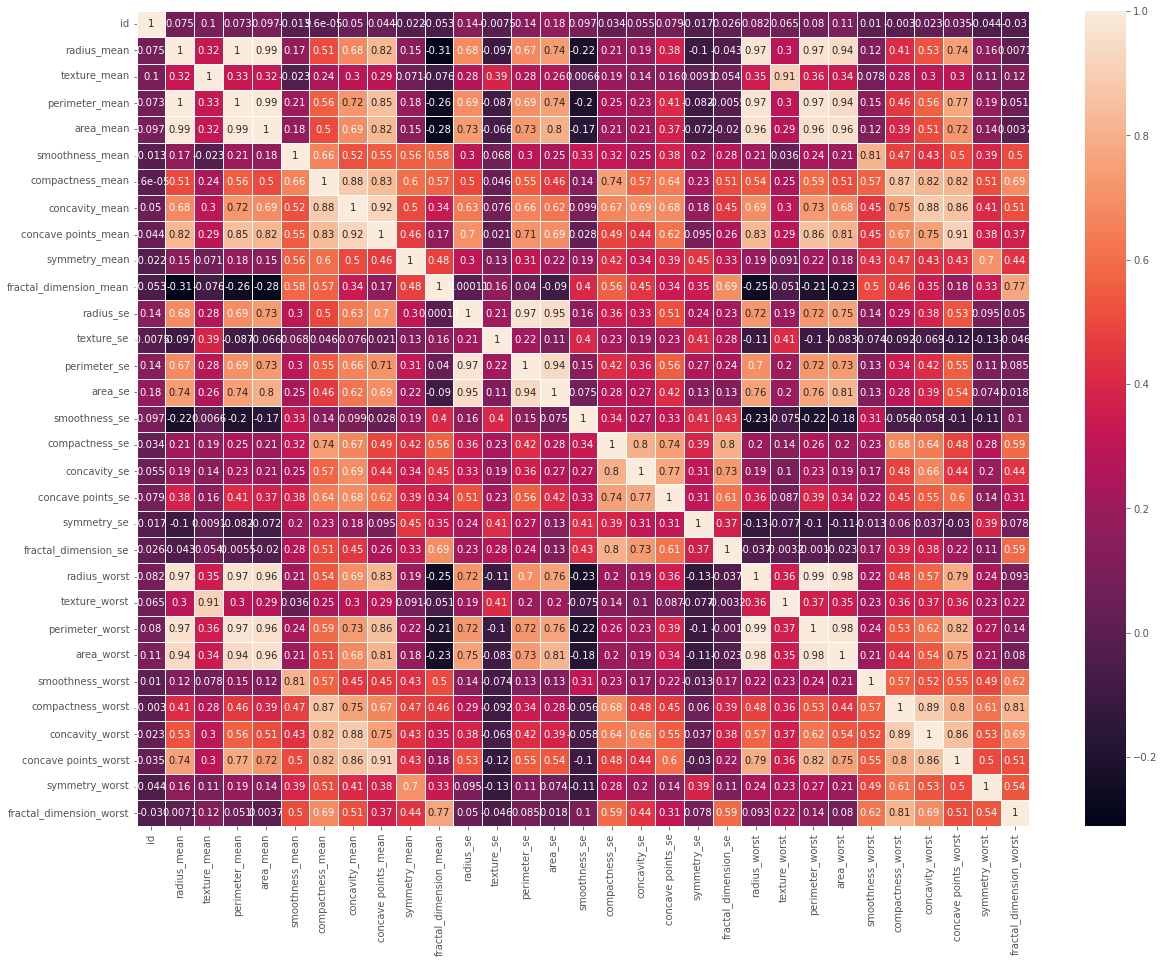

In [13]:
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(df.corr(),ax=ax,annot=True,linewidth=.5)

In [14]:
#Univariate Analysis

In [15]:
fig= px.histogram(df, x='diagnosis',color='diagnosis',height=500,width=500, barmode='relative')
fig.show()

Inference:Benign is more diagnosed than Malignant

In [16]:

import plotly.express as px

fig1 = px.bar(df, x='diagnosis', y='texture_worst', height=500,width=500,title='Stacked Bar Chart - Hover on individual items')
fig1.show()

Inference: the texture_worst for Benign is higher than Malignant 

In [17]:
#PieChart

In [18]:

fig = px.pie(df, values='compactness_worst', names='diagnosis', title='Relation')
fig.show()

Inference:The percentage of Compactness_worst is higher for Malignant than Benign

In [19]:
#Multivariate Analysis

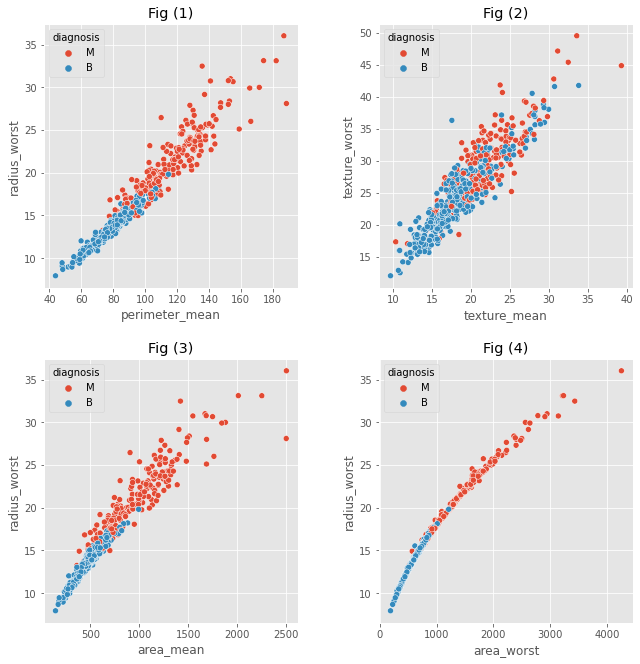

In [20]:
#positive Correlation
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.tight_layout(pad=5.0)
sns.scatterplot(x='perimeter_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='area_mean',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='texture_mean',y='texture_worst',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_worst',y='radius_worst',data=df,hue='diagnosis',ax=ax[1][1])
ax[0,0].set_title("Fig (1)")
ax[0,1].set_title("Fig (2)")
ax[1,0].set_title("Fig (3)")
ax[1,1].set_title("Fig (4)")
plt.show()

Inference: Fig(1) : The perimeter_mean and radius_mean is higher for Malignant<br />
           Fig(2) : The texture_mean and texture_worst is lower for Benign than malignant <br />
           Fig(3) : The radius_worst and area_mean is heigher for Malignant and Benign<br />
           Fig(4) : The radius_worst and area_worst is lower for benign than malignant

In [21]:
#Negative Correlation

Text(0.5, 1.0, 'Fig (4)')

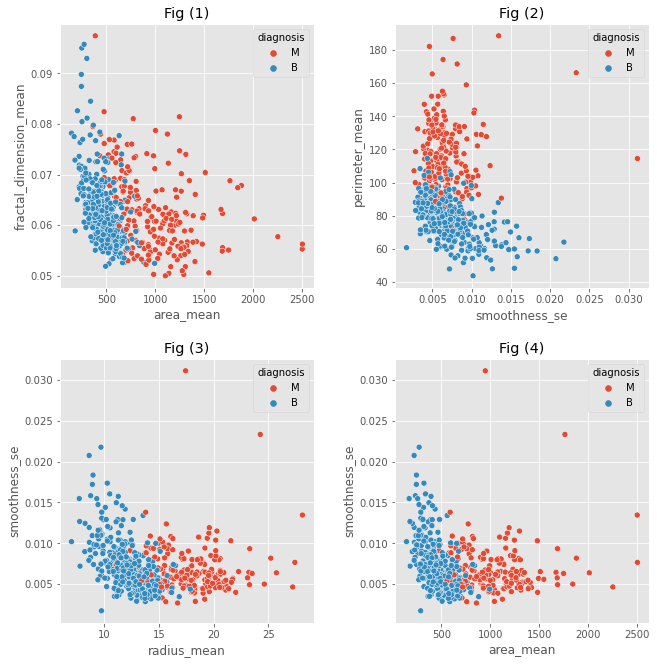

In [22]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.tight_layout(pad=5.0)
sns.scatterplot(x='area_mean',y='fractal_dimension_mean',data=df,hue='diagnosis',ax=ax[0][0])
sns.scatterplot(x='radius_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][0])
sns.scatterplot(x='smoothness_se',y='perimeter_mean',data=df,hue='diagnosis',ax=ax[0][1])
sns.scatterplot(x='area_mean',y='smoothness_se',data=df,hue='diagnosis',ax=ax[1][1])
ax[0,0].set_title("Fig (1)")
ax[0,1].set_title("Fig (2)")
ax[1,0].set_title("Fig (3)")
ax[1,1].set_title("Fig (4)")

Plots

In [23]:
#Implot

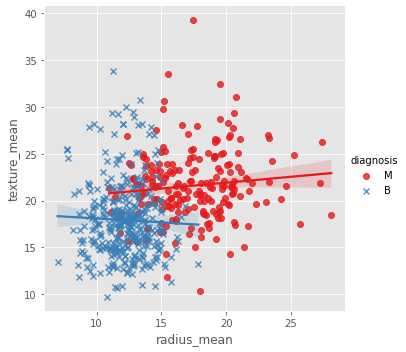

In [24]:
sns.lmplot(x="radius_mean", y="texture_mean",hue="diagnosis", data=df,
           markers=["o", "x"], palette="Set1");

Inference:

In [25]:
#Pair plot

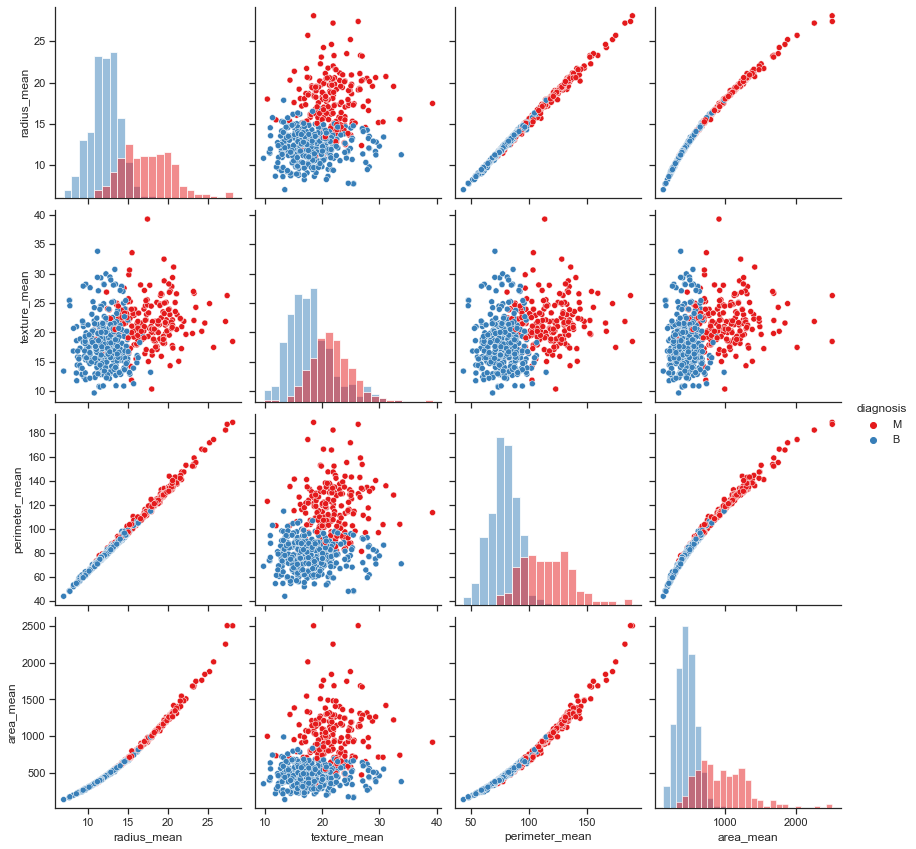

In [26]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(data=df[['diagnosis' ,'radius_mean','texture_mean','perimeter_mean','area_mean']], palette="Set1",hue="diagnosis", height=3,diag_kind="hist")
plt.show()
#sns.pairplot(data=df[['diagnosis' ,'radius_mean','texture_mean','perimeter_mean','area_mean',hue="diagnosis")]],hue="diagnosis", height=3, diag_kind="hist")

In [27]:
#boxen plot

<AxesSubplot:xlabel='diagnosis', ylabel='perimeter_mean'>

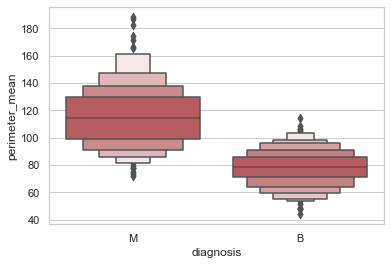

In [28]:
sns.set_theme(style="whitegrid")
sns.boxenplot(x="diagnosis", y="perimeter_mean",
              color="r",
              scale="linear", data=df)

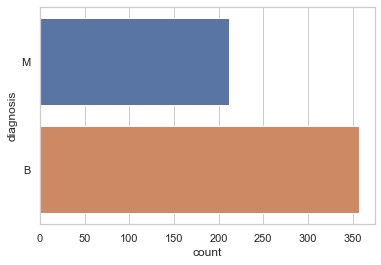

In [29]:
#count plot
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=df.diagnosis, data=df)
        plt.show()

<b style="font_size : 20px">Distribution Plot</b>

In [30]:
import plotly.figure_factory as ff


hist_data = [df['radius_mean']]
group_labels = ['breast_cancer'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

Scatter plot using plotly

In [31]:
fig = px.scatter(df,x='radius_mean',y='perimeter_mean',color='diagnosis',height=500,width=700,size_max=60)
fig.show()

In [32]:
fig2=px.scatter(df,x='texture_worst',y= 'symmetry_worst',color='diagnosis',height=500,width=700,size_max=60)
fig2.show()

<b>Data preprocessing</b>

In [33]:
X=df.iloc[:,2:].values
y=df.iloc[:,1].values

In [34]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
labelencode = LabelEncoder()
y=labelencode.fit_transform(y)

In [35]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [36]:
#applying standard scaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [37]:
# pip install keras

In [38]:
# # pip install tensorflow
# pip install pywrap_tensorflow

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [40]:
classifier = Sequential()

In [41]:
#adding the input and first hidden layer

classifier.add(Dense(16, activation='relu', kernel_initializer='glorot_uniform',input_dim=30))

#adding second layer
classifier.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform'))

#adding the output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [42]:
classifier.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
classifier.fit(X_train,y_train,batch_size=100,epochs=150)

Epoch 1/150
4/4 [==============================] - 1s 8ms/step - loss: 0.6956 - accuracy: 0.3568
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5628
Epoch 3/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.7035
Epoch 4/150
4/4 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.7739
Epoch 5/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6778 - accuracy: 0.8141
Epoch 6/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.8367
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.8467
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.8643
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.8769
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.8869
Epoch 11/150
4/4 [===========

In [44]:
y_pred=classifier.predict(X_test)
y_pred = (y_pred>0.5)

6/6 [==============================] - 0s 5ms/step


In [45]:
from sklearn.metrics import accuracy_score


print(f"The test accuracy is very high i.e.{accuracy_score(y_test,y_pred)}")

The test accuracy is very high i.e.0.9883040935672515


In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[103,   0],
       [  2,  66]], dtype=int64)

CLUSTERING ON raidus_mean  AND texture_mean


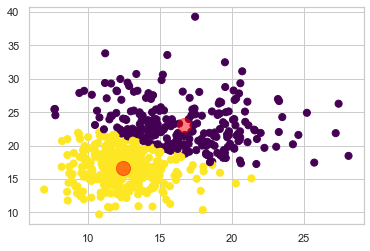

In [47]:
print('CLUSTERING ON raidus_mean  AND texture_mean')
X = df[['radius_mean','texture_mean']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'radius_mean'], X.loc[:, 'texture_mean'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

In [48]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['radius_mean', 'texture_mean']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

Text(0, 0.5, 'Defense')

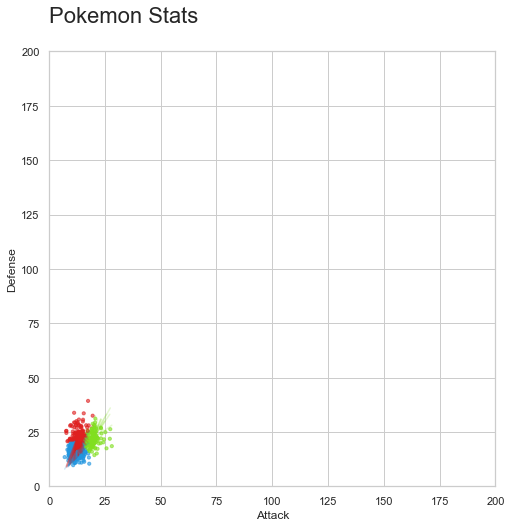

In [51]:
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.radius_mean, df.texture_mean, c=df.c, alpha = 0.6, s=10)
# plot centroids
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# plot lines
for idx, val in df.iterrows():
    x = [val.radius_mean, val.cen_x,]
    y = [val.radius_worst, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.2)
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)
# x and y limits
plt.xlim(0,200)
plt.ylim(0,200)
# title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')
#on hold